In [1]:
"""
Reconocimiento de patrones: Tarea 3
Luis Ontiveros
"""
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

os.chdir('Data sets/Pima Indian Data Set')

## Valores Atípicos 

Graficaremos el diagrama de caja de cada variable del conjunto de datos del<i> Pima Indians Diabetes </i> para identificar las variables con más valores atípicos. Para esto se modificaron los datos con valor cero por la media en esa variable (excepto las variables "emb" y "class").

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

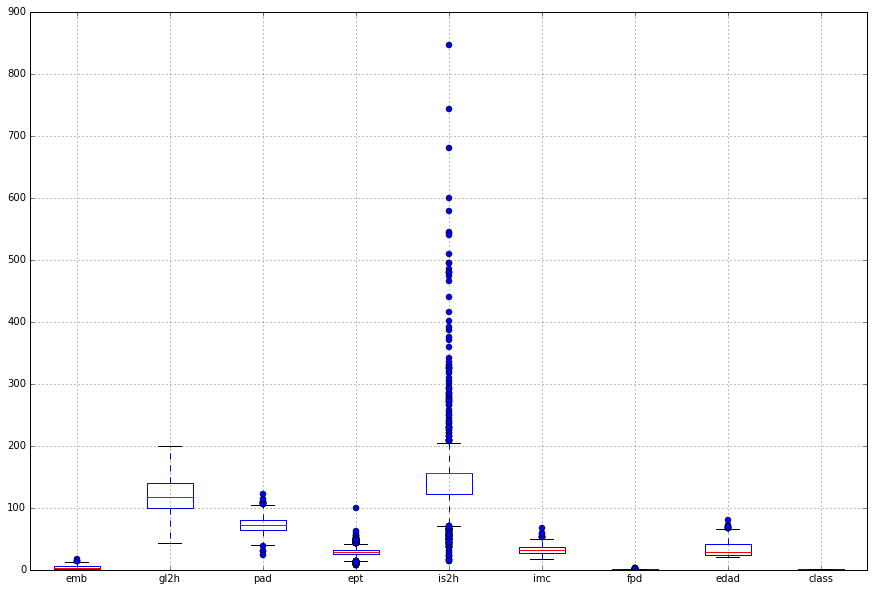

In [2]:
df = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
for column in df:
    if column not in ['emb', 'class']:
        df.loc[df[column] == 0,column] = np.nan 
df2 = df.fillna(df.mean())
print(df2.describe(), '\n')
fig = plt.figure(1, figsize=(15, 10))
df2.boxplot(sym = 'ko', whis = 1.5)

plt.show()

Es notable que la variable "is2h" es la que tiene más valores atípicos en comparación con el resto, o al menos eso es lo que la gráfica muestra. Recordemos que esta variable es la que causo más problemas por valores faltantes y al sustituir todos estos por la media, provoca que el rango intercuartílico sea más pequeño y por lo tanto las barreras que definen cuando un valor es considerado atípico o no son más cercanas a este. A continuación incrementaremos las barreras del diagrama de caja en una razón de 3RI para ver la diferencia.

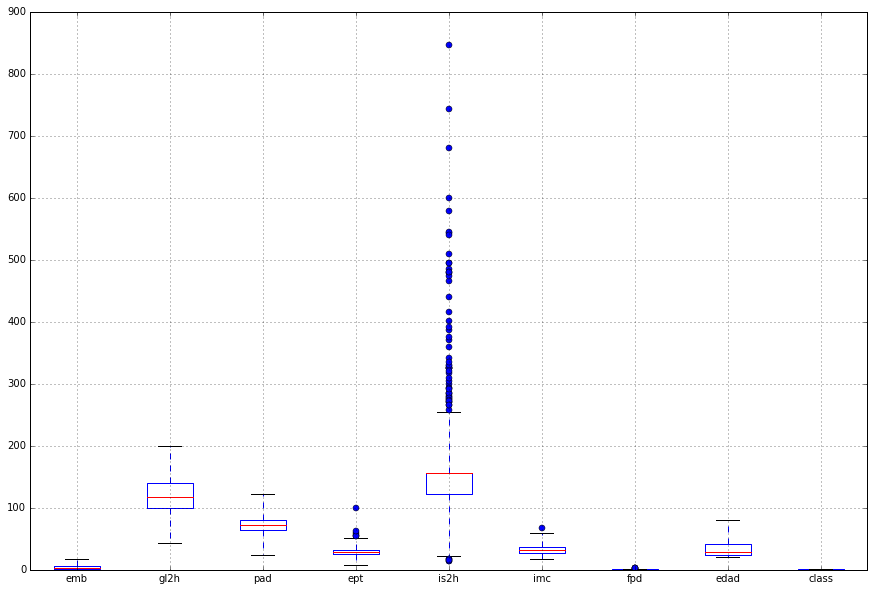

In [3]:
fig = plt.figure(1, figsize=(15, 10))
df2.boxplot(sym = 'ko', whis = 3)

plt.show()

En esta ocasión se observa que incluso tres de las variables que contenían valores atípicos ya no aparecen con esta medida como es el caso de "emb", "pad" y "edad", lo que crea un nuevo conflicto ya que probablemente esos datos si se encontraban fuera de lo considerado "normal" en el área y ahora nosotros los consideramos dentro de lo permitido (por ejemplo una persona como presión arterial diastólica de 122 en un principio era atípica y paso a no ser notoria). Además, aunque si se redujeron, sigue habiendo bastantes valores atípicos en "is2h" por lo que incrementar las barreras en el diagrama no afectó de manera notoria el número de estos.

A continuación haremos el mismo analisis pero con los datos de rendimiento de combustible y con los de iris determinando primeramente que variables son problemáticas por valores faltantes.

### Rendimiento de combustible

In [48]:
df = pd.read_csv("auto-mpg.data",
            names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'aceleration', 'model year', 'origin', 'carname'])
print(df.describe(), '\n')
print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en todas las columnas')
for column in df:
        porcentaje = df[column].isnull().sum()/df.shape[0] * 100
        print(column," : ",porcentaje)

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       aceleration  model year      origin  
count   406.000000  406.000000  406.000000  
mean     15.519704   75.921182    1.568966  
std       2.803359    3.748737    0.797479  
min       8.000000   70.000000    1.000000  
25%      13.700000   73.000000    1.000000  
50%      15.500000   76.000000    1.000000  
75%      17.175000   79.000000    2.

En este conjunto de datos solo tenemos valores faltantes en dos de las variables: "mpg" y "horsepower", sin embargo es menos del dos por ciento en ambos casos. Aún así realizaremos imputación con la media y graficaremos los diagramas de caja para analizar los valores atípicos.

              mpg   cylinders  displacement  horsepower       weight  \
count  406.000000  406.000000    406.000000  406.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.738404    1.712160    104.922458   38.480531   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   76.000000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  129.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       aceleration  model year      origin  
count   406.000000  406.000000  406.000000  
mean     15.519704   75.921182    1.568966  
std       2.803359    3.748737    0.797479  
min       8.000000   70.000000    1.000000  
25%      13.700000   73.000000    1.000000  
50%      15.500000   76.000000    1.000000  
75%      17.175000   79.000000    2.

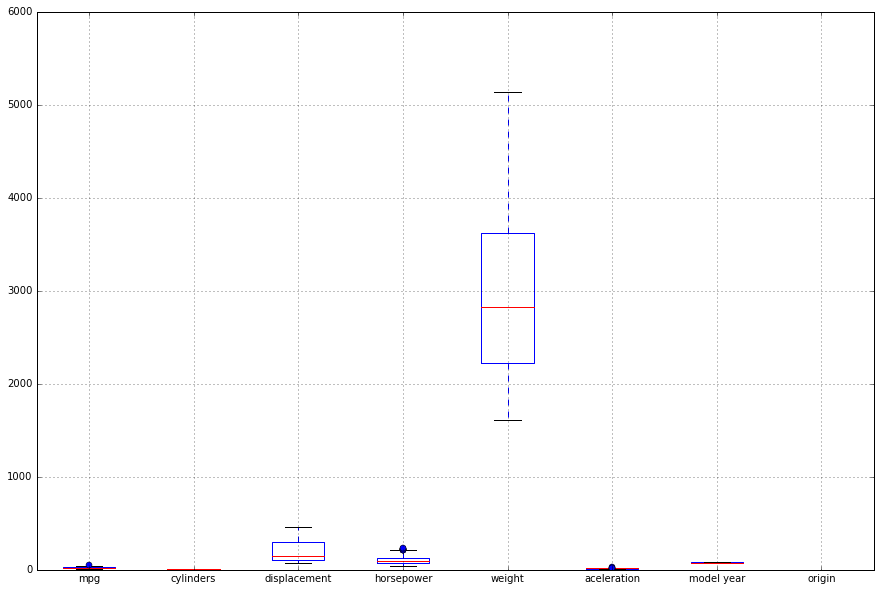

In [52]:
df2 = df.fillna(df.mean())
print(df2.describe(), '\n')
fig = plt.figure(1, figsize=(15, 10))
df2.boxplot(sym = 'ko', whis = 1.5)
print ('Porcentaje de datos nulos en todas las columnas')
for column in df2:
        porcentaje = df2[column].isnull().sum()/df2.shape[0] * 100
        print(column," : ",porcentaje)
plt.show()

Las variables "mpg", "horsepower" y "aceleration" al parecer cuentan con un solo valor atípico y el resto con ninguno, por lo tanto este conjunto no tendría que ocasionar muchos problemas. También nos podemos dar cuenta que las dos primeras variables mencionadas son las mismas que comentabamos anteriormente con valores faltantes.

### Taxonomía de las flores

In [55]:
os.chdir("../Iris Data Set")
df = pd.read_csv("iris.data",
            names = ["sepal length","sepal width","petal length","petal width","class"])
print(df.describe(), '\n')
print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en todas las columnas')
for column in df:
        porcentaje = df[column].isnull().sum()/df.shape[0] * 100
        print(column," : ",porcentaje)

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

Contabilidad de valores nulos por columna
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64 

Porcentaje de datos nulos en todas las columnas
sepal length  :  0.0
sepal width  :  0.0
petal length  :  0.0
petal width  :  0.0
class  :  0.0


Los datos parecen estar completos y no contener valores faltantes, sin embargo realizaremos los diagramas de caja para cada variable y así identificar si hay valores atípicos.

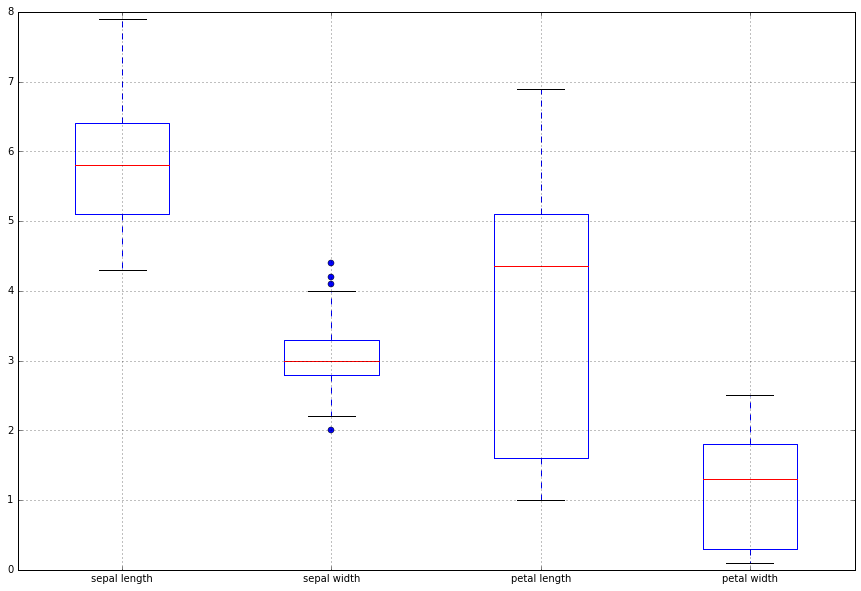

In [57]:
fig = plt.figure(1, figsize=(15, 10))
df.boxplot(sym = 'ko', whis = 1.5)
plt.show()

Los datos en general parecen ser muy consistentes, sin embargo, en el diagrama podemos ver que la variable "sepal width" tiene cuatro valores atípicos y podría ser de interes estudiar estos. 